In [0]:
from __future__ import print_function
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from google.colab import auth, drive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from oauth2client.client import GoogleCredentials
import zipfile, os
import pickle
import pylab as plt
import warnings
warnings.filterwarnings('ignore')


In [0]:
batch_size = 128
num_classes = 15
epochs = 12

# Input image dimensions
img_rows, img_cols = 32, 32
!pwd


/content


In [0]:
import os
sub_dir = [x[0] for x in os.walk('')]


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
% cd drive/My Drive

/content/drive/My Drive


In [0]:
!unzip extracted_images.zip

In [0]:
% cd extracted_images
!pwd

/content/drive/My Drive/extracted_images
/content/drive/My Drive/extracted_images


In [0]:
from keras.datasets import mnist
(xtr, ytr), (xte, yte) = mnist.load_data()

In [0]:
# with open(./outputpkl, mode='rb') as file:
#     data = pickle.load(file, encoding='bytes')
# print(data['filenames'])

In [0]:
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from scipy.misc import imread
from matplotlib.pyplot import imshow
from scipy.misc import imread,imresize

size_image = 28
def create_numpy(pkl_path, size_image): 
  mapper = {'0':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '+':10, '-':11, 'x':12, 'v':13, '=':14}
  allowed = [10, 11, 12, 13, 14]
  with open(pkl_path, mode='rb') as file:
    data = pickle.load(file, encoding='bytes')
  print(data['file_names'][0])  
  size_dataset = 30530
  images_numpy=np.zeros(shape=[size_dataset,size_image,size_image], dtype=float)
  labels_numpy=np.zeros(shape=[size_dataset],dtype=int)
  
  itr=0
  for i in range(len(data['file_names'])):
    l=mapper[data['labels'][i]]
    if l in allowed:
      img=(imresize(imread(data['file_names'][i] , mode="L"), (size_image,size_image)).astype(np.float))/255.0
      #img=(imread(data['file_names'][i] , mode="L").astype(np.float))/255.0
      images_numpy[itr]=img
      labels_numpy[itr]=l
#     print('ok', end=' ')
  print('ok')
  return images_numpy, labels_numpy
      
images,labels=create_numpy("./outputpkl", 28)
label_set = set(labels)
print(label_set)

/content/drive/My Drive/extracted_images/4/56344_0.png


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


In [0]:
#print(images[0][0], labels)
from matplotlib.pyplot import imshow

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.14, random_state=42)
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(52080, 28, 28) (8479, 28, 28) (52080,) (8479,)


In [0]:
#-------------------DONT RUN-------------------
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Rescale the image values to [0, 1]
X_train /= 255
X_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))
print(y_train[0])


(52080, 28, 28, 1) (8479, 28, 28, 1) (52080, 15) (8479, 15)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
def draw_training_curve(history):
	
	plt.figure(1)
	# History for accuracy
	plt.subplot(211)
	plt.plot(history.history['acc'])
	plt.plot(history.history['val_acc'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='upper left')

	# History for loss
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'test'], loc='upper left')

	plt.show()

Train on 52080 samples, validate on 8479 samples
Epoch 1/12
52080/52080 [==============================] - 8s 158us/step - loss: 2.3737 - acc: 0.1682 - val_loss: 2.3425 - val_acc: 0.1797
Epoch 2/12
52080/52080 [==============================] - 7s 142us/step - loss: 2.3440 - acc: 0.1839 - val_loss: 2.3449 - val_acc: 0.1797
Epoch 3/12
52080/52080 [==============================] - 7s 143us/step - loss: 2.3487 - acc: 0.1795 - val_loss: 2.3454 - val_acc: 0.1797
Epoch 4/12
52080/52080 [==============================] - 7s 142us/step - loss: 2.3479 - acc: 0.1806 - val_loss: 2.3416 - val_acc: 0.1797
Epoch 5/12
52080/52080 [==============================] - 7s 143us/step - loss: 2.3454 - acc: 0.1806 - val_loss: 2.3429 - val_acc: 0.1797
Epoch 6/12
52080/52080 [==============================] - 7s 142us/step - loss: 2.3444 - acc: 0.1807 - val_loss: 2.3417 - val_acc: 0.1797
Epoch 7/12
52080/52080 [==============================] - 7s 143us/step - loss: 2.3437 - acc: 0.1807 - val_loss: 2.3416 - v

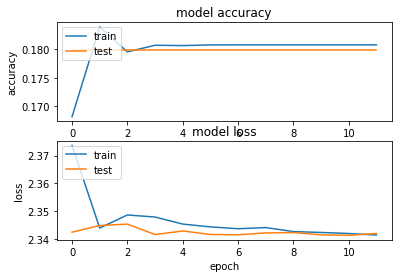

In [0]:
# Set the CNN Architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Comple the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Train the model
results= model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

# Save the model weights for future reference
model.save('mnist_cnn_model.h5')

# Evaluate the model using Accuracy and Loss
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

draw_training_curve(results)